<a href="https://colab.research.google.com/github/SuvirKapse/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from numpy import math

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#let's mount the google drive to import the dataset.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# creating the path to read the dataset file on drive.
path= "/content/drive/MyDrive/ml-capstone-project/SeoulBikeData.csv"
df = pd.read_csv(path,encoding= 'unicode_escape')


# **Information About The Data**

In [ ]:
# Checking shape of dataframe
df.shape

(8760, 14)

In [ ]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Renaming the complex columns names.

df.columns=['Date','Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'DPT',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day']

In [ ]:
# Viewing the data of top 5 rows to take a peek of the data.
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# View the data of bottom 5 rows to take a peek of the data.

df.tail()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Information about the  dataset  and its each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8760 non-null   object 
 1   Rented_Bike_Count  8760 non-null   int64  
 2   Hour               8760 non-null   int64  
 3   Temperature        8760 non-null   float64
 4   Humidity           8760 non-null   int64  
 5   Wind_speed         8760 non-null   float64
 6   Visibility         8760 non-null   int64  
 7   DPT                8760 non-null   float64
 8   Solar_Radiation    8760 non-null   float64
 9   Rainfall           8760 non-null   float64
 10  Snowfall           8760 non-null   float64
 11  Seasons            8760 non-null   object 
 12  Holiday            8760 non-null   object 
 13  Functioning_Day    8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
# Looking for the description of the dataset to get insights of the data
df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# Missing data counts
df.isnull().sum()

Date                 0
Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
DPT                  0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
dtype: int64

In [ ]:
# Checking for duplicates
print(len(df[df.duplicated()]))

0


Date contains day, month and years, out of which not every aspect is useful 
   we can divide days to weekdays and weekends and since our dataset contains 
   data over a span of only one year their is no need of (year) column.

In [ ]:
import datetime as dt
df['Date'] =df['Date'].apply(lambda x:
                              dt.datetime.strptime(x,'%d/%m/%Y'))

In [ ]:
df['Weekend'] = df['Date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )
df['Month'] = df['Date'].dt.month

In [ ]:
#Change the int64 column into catagory column
cat =['Hour','Month','Weekend']
for i in cat:
  df[i]=df[i].astype('category')

In [ ]:
# Dropping the date column as we have divided it into various component

df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   DPT                8760 non-null   float64 
 7   Solar_Radiation    8760 non-null   float64 
 8   Rainfall           8760 non-null   float64 
 9   Snowfall           8760 non-null   float64 
 10  Seasons            8760 non-null   object  
 11  Holiday            8760 non-null   object  
 12  Functioning_Day    8760 non-null   object  
 13  Weekend            8760 non-null   category
 14  Month              8760 non-null   category
dtypes: category(3), float64(6), int64(3), object(3)
memory 

In [ ]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Weekend,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,12


# **EDA (Exploratory Data Analysis)**

# **Univariate Analysis**

## **Dependent Variable**

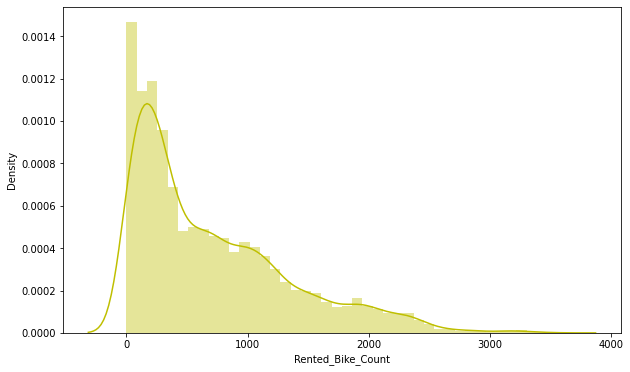

In [ ]:
#Distribution plot of Rent Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="Y")


The above graph shows that Rent Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

lets also check it for outliers with the help of box plot.

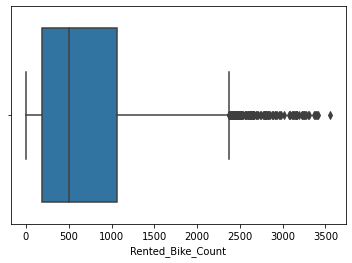

In [ ]:
sns.boxplot(x=df['Rented_Bike_Count'])


there are many outliers as shown in above plot.

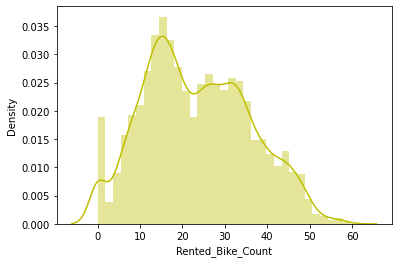

In [ ]:
sns.distplot(np.sqrt(df['Rented_Bike_Count']),color='y')

After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

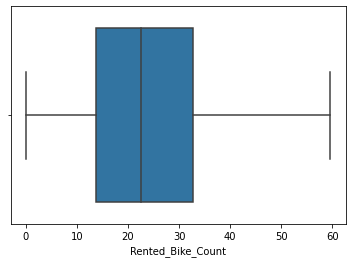

In [ ]:
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))

After normalising the column outliers are also eliminated.

The prefix ‘Uni’ means one, meaning ‘univariate analysis’ is the analysis of one variable at a time.

For numeric features, we want to know the range of values present and how often these values (or groups of values) occur.



## **Numeric features**

In [ ]:
# features which are continuous variable
continuous_variable = ['Temperature','DPT', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall']

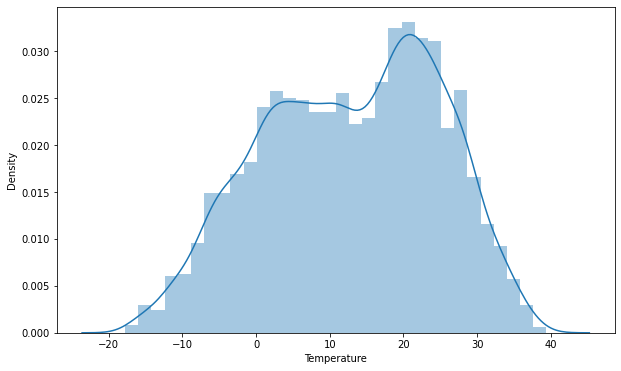

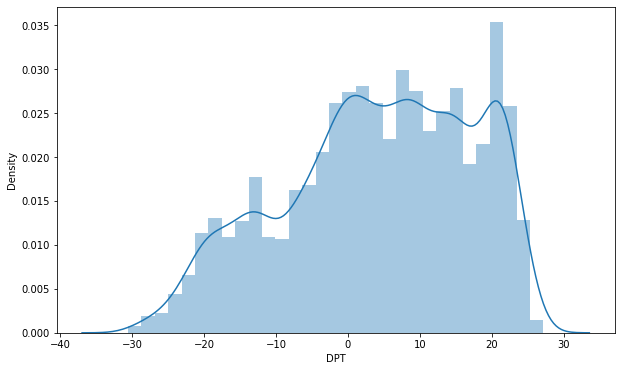

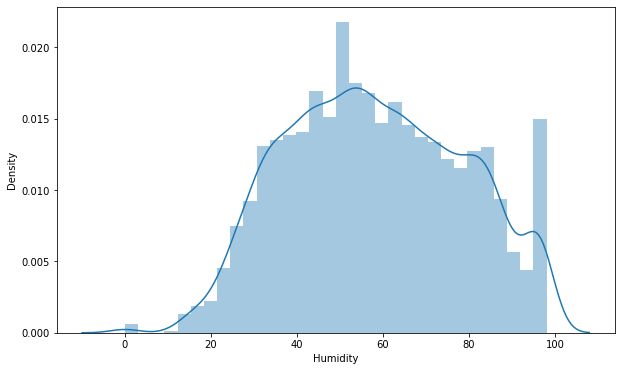

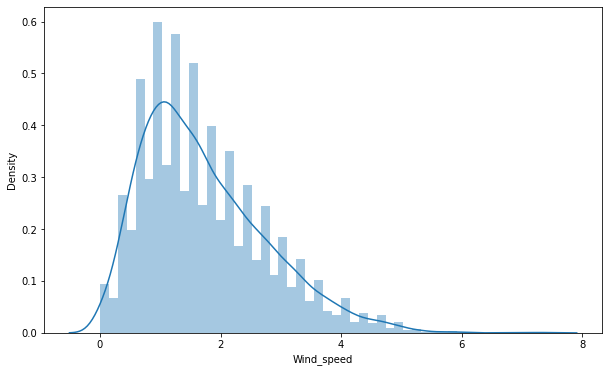

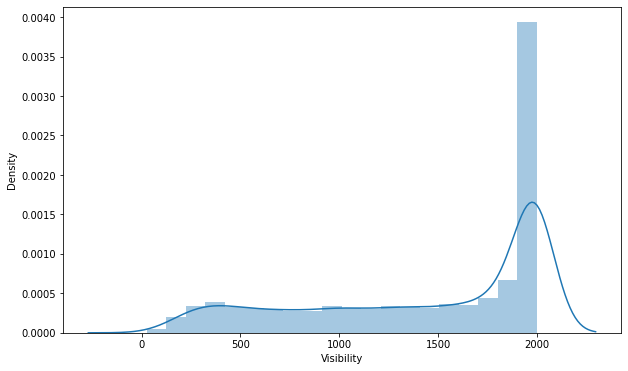

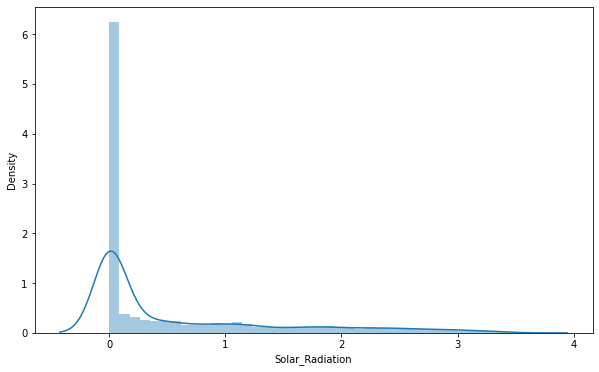

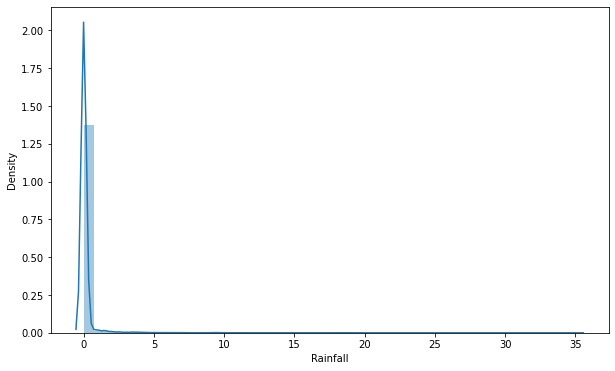

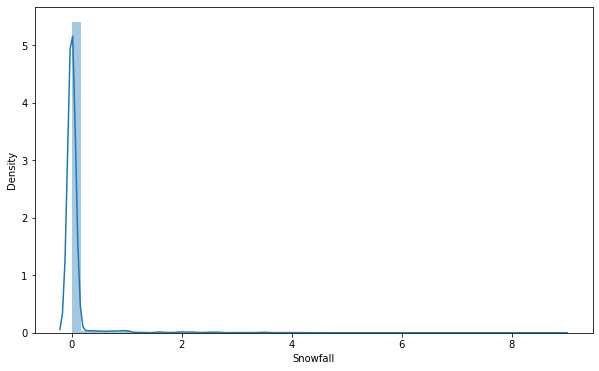

In [ ]:
#To analyze the distribution of all numerical features using displot.
for i in continuous_variable :
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[i])
  plt.xlabel(i)
plt.show()

In [ ]:
#frequency count for categorical Variable
categorical_variable = ['Hour','Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Weekend']
for i in categorical_variable:
  freq_table = pd.crosstab(df[i],"count")
  print(freq_table)
  print("======================")

col_0  count
Hour        
0        365
1        365
2        365
3        365
4        365
5        365
6        365
7        365
8        365
9        365
10       365
11       365
12       365
13       365
14       365
15       365
16       365
17       365
18       365
19       365
20       365
21       365
22       365
23       365
col_0    count
Seasons       
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
col_0       count
Holiday          
Holiday       432
No Holiday   8328
col_0            count
Functioning_Day       
No                 295
Yes               8465
col_0  count
Month       
1        744
2        672
3        744
4        720
5        744
6        720
7        744
8        744
9        720
10       744
11       720
12       744
col_0    count
Weekend       
0         6264
1         2496


# **Bivariate analysis**

Checking of Correlation between Rented_Bike_Count(dependent variable) and other variables(independent variable).

## **Categorical Variable**

In [ ]:
#categorical variable given in dataset are:
categorical_variable = ['Hour','Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Weekend']

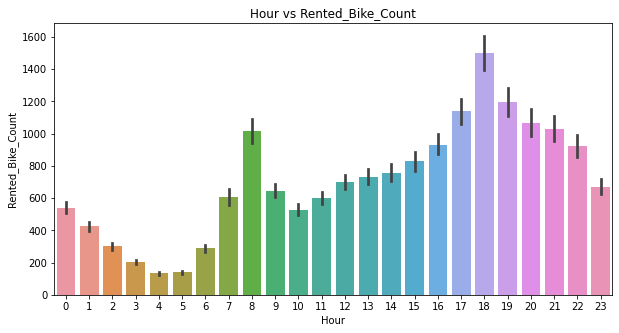

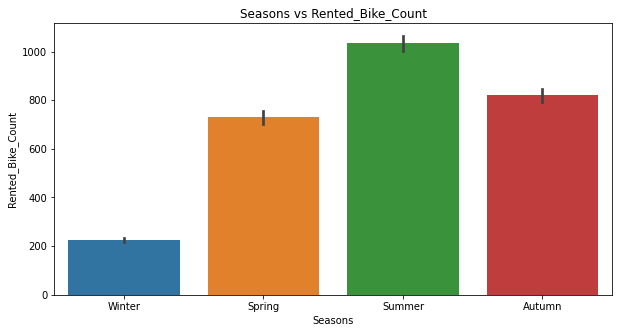

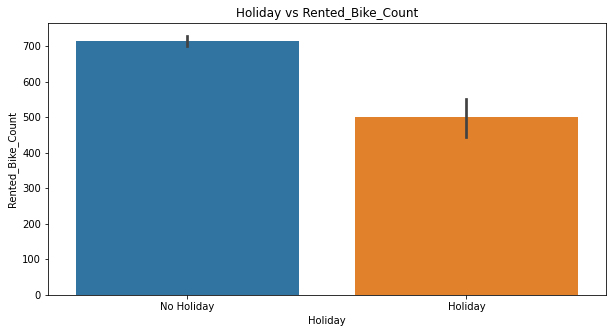

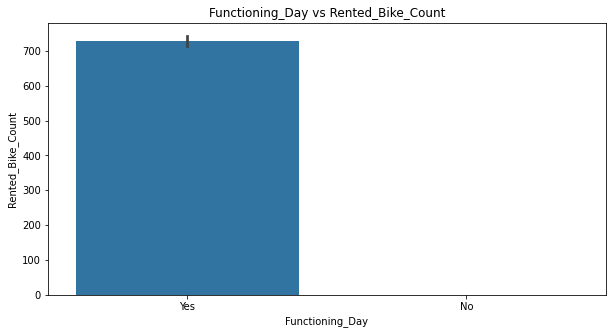

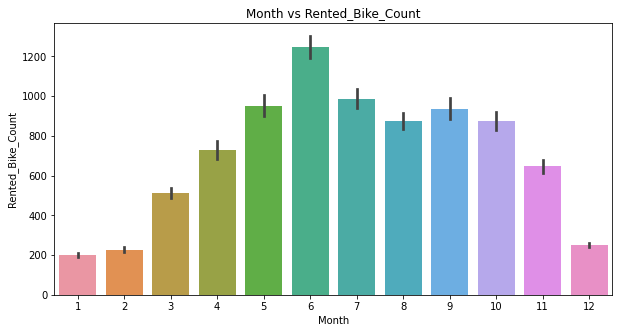

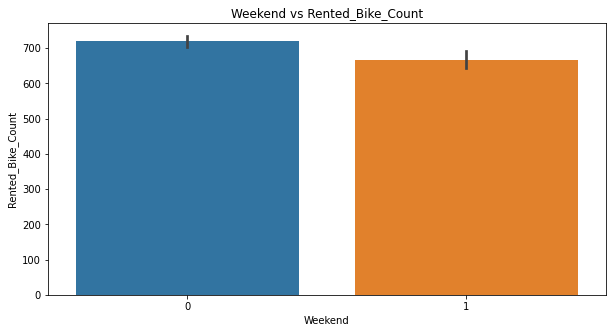

In [ ]:
for i in categorical_variable:
  plt.figure(figsize=(10,5))
  sns.barplot(x=i,y="Rented_Bike_Count",data=df)
  plt.xlabel(i)
  plt.ylabel("Rented_Bike_Count")
  plt.title(i+' vs '+ "Rented_Bike_Count")
  plt.show()

Checking of Correlation between Rented_Bike_Count(dependent variable) and other variables(independent variable).

## **Regression plot**

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

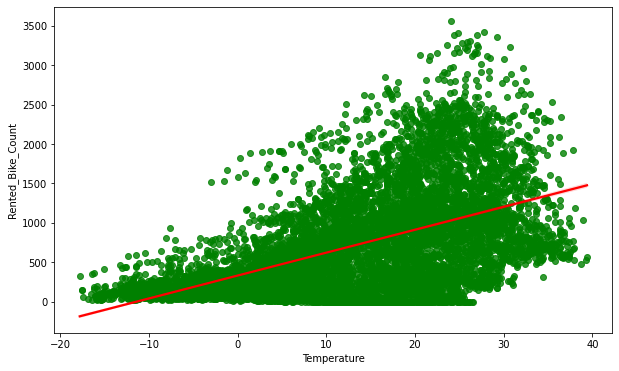

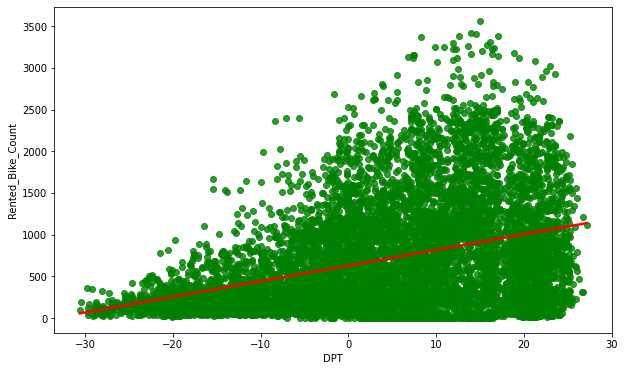

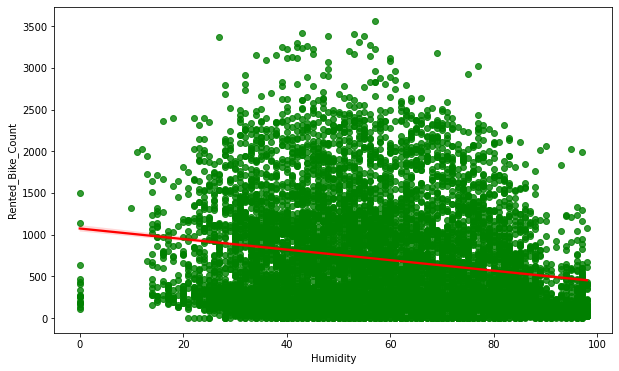

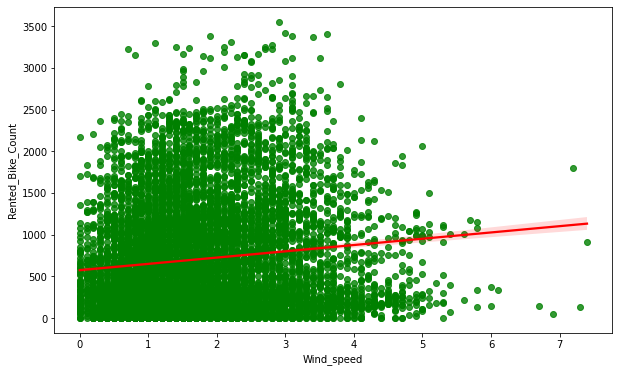

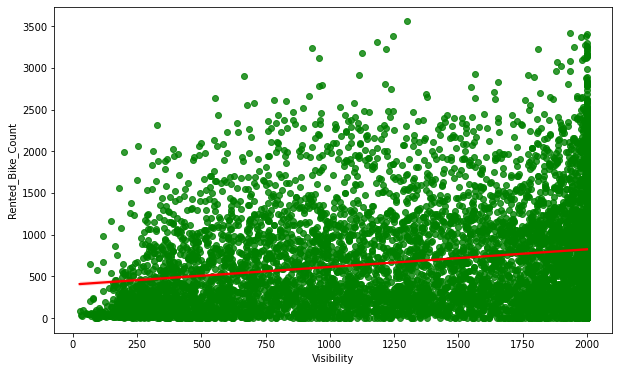

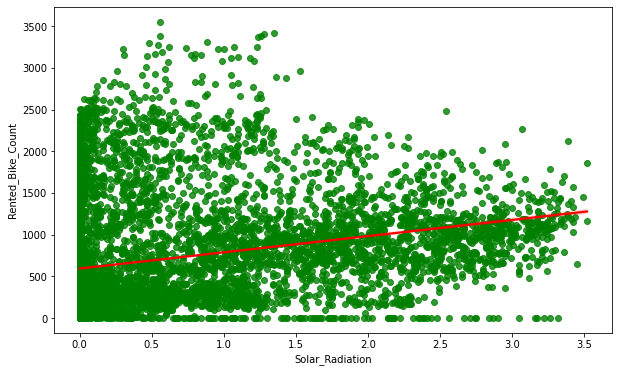

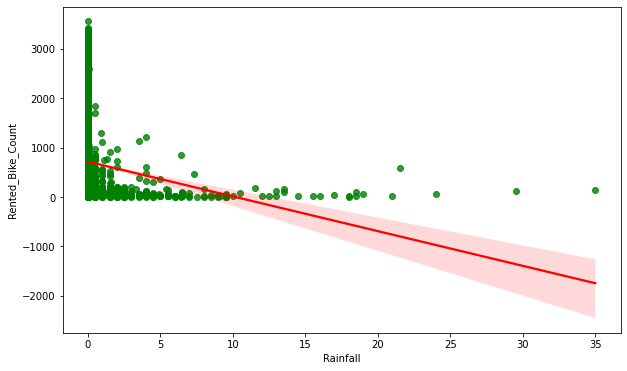

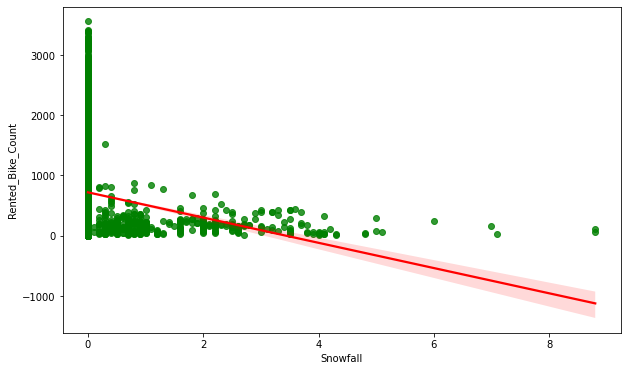

In [ ]:
#regression plot between Rented_Bike_Count and other variables
for i in continuous_variable:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[i],y=df['Rented_Bike_Count'],scatter_kws={"color": 'green'}, line_kws={"color": "red"})

# **Multivariate Analysis**

Multivariate analysis is used to describe analyses of data where there are multiplevariables or observations for each unit or individual.


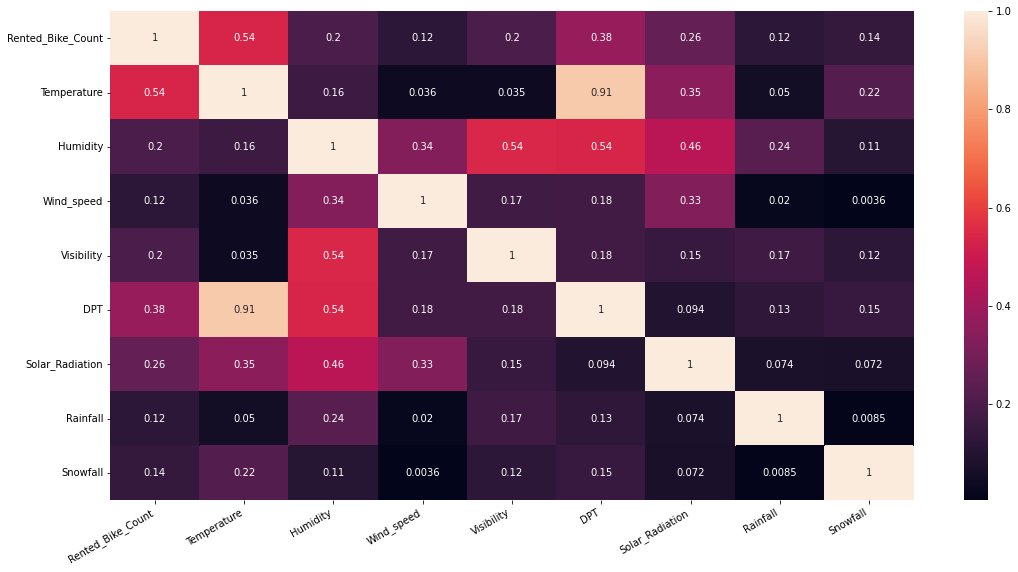

In [ ]:

# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

There is high correlation between Temperature and DPT.We will cross check it to decide weather to drop either of the column or not.

Dew point temperature:

We know that the dew point temperature is related to temperature and can be approximated as follows:

Td = T - ((100 - RH)/5.)

Where

Td - Dew point temperature (in degrees Celsius)

T - Observed temperature (in degrees Celsius)

RH - Relative humidity (in percent)

,Temperature,DPT
Temperature,1.000000,0.912798
DPT,0.912798,1.000000


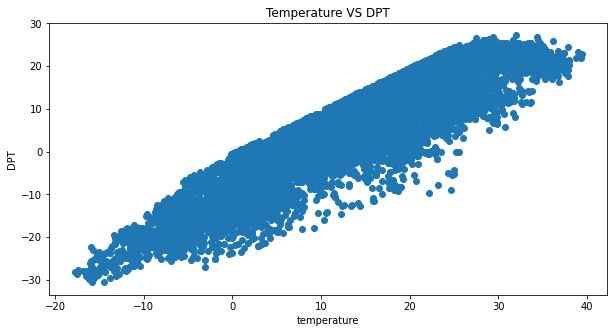

In [ ]:
# Scatter plot to visualize the relationship between
# temperature and dew point temperature
plt.figure(figsize=(10,5))
plt.scatter(x='Temperature',y='DPT',data=df)
plt.xlabel('temperature')
plt.ylabel('DPT')
plt.title('Temperature VS DPT')

#correlation between temp. and DPT
df[['Temperature','DPT']].corr()

In [ ]:
# The temperature and dew point temperature are highly correlated (0.912).
"""therefore we can drop the DPT column from the dataset since having two 
   variable who are so strongly correlated will not increase the accuracy of 
   predictions, and will only increase the model complexity."""

df.drop('DPT', axis=1,inplace=True)


# **Dummy Encoding**

In [ ]:
#creating dummy variable for ease of operations on categorical features.
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Weekend', 'Month'], dtype='object')

In [ ]:
# creating a function for encoding

df_copy = df
def encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for i in categorical_features:
    df_copy = encoding(df_copy, i) # deploying the created funtion
df_copy.head()   

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


#**Variance Inflation Factor** 

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df_copy[[i for i in df_copy.describe().columns if i not in ['Rented_Bike_Count' ,'Seasons_Spring','Seasons_Summer','Seasons_Winter']]])

,variables,VIF
0,Temperature,24.141019
1,Humidity,20.061619
2,Wind_speed,5.256720
3,Visibility,11.390446
4,Solar_Radiation,6.572372
5,Rainfall,1.112059
6,Snowfall,1.169827
7,Hour_1,1.831734
8,Hour_2,1.834467
9,Hour_3,1.837260


After droping 'Seasons_Spring','Seasons_Summer'and 'Seasons_Winter' we got VIF value in tolerable range .therefore we will be droping them form final independent variable list.

In [ ]:
df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'Weekend_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

# **MODEL BUILDING**

In [ ]:
#Assign the value in X and Y
X = df_copy.drop(columns=['Rented_Bike_Count' ,'Seasons_Spring','Seasons_Summer','Seasons_Winter'], axis=1)
y = np.sqrt(df_copy['Rented_Bike_Count'])

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 44)
(2190, 44)


In [ ]:
# Viewing the data of top 5 rows of variables assigned to X.
X.head()


,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Viewing the data of top 5 rows of variables assigned to Y.
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

#**LINEAR REGRESSION** 

In [ ]:
# Fitting Linear Regression to the Training set
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7722101548255267

In [ ]:
reg.score(X_test, y_test)

0.7893518482962673

In [ ]:
#check the coefficeint
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00,  3.51130869e+00,  2.82758278e+01,
       -1.42458875e+00, -8.13449897e-01,  2.78279515e+00,  3.64717046e+00,
        6.05517990e+00,  7.95370527e+00,  1.82995598e+00, -4.25850822e-01,
        5.43112297e+00,  8.09224953e+00,  7.43741360e+00,  2.07210333e+00])

In [ ]:
# predicting  train test values.
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

# **Evaluation**

*   ### ***Evaluating the model on train set***


In [ ]:
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07751288189292
RMSE : 5.9226271942350825
MAE : 4.4740240929968005
R2 : 0.7722101548255267
Adjusted R2 : 0.7675375426168196


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

*   ### ***Evaluating the model on test set***


In [ ]:
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.27533089591942
RMSE : 5.768477346399084
MAE : 4.41017847531819
R2 : 0.7893518482962673
Adjusted R2 : 0.7850308605690113


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,4.41,33.275,5.768,0.789,0.79


# **LASSO REGRESSION**

In [ ]:
# Fitting LASSO Regression to the Training set
lasso  = Lasso(alpha= 0.1 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7466477756861858 0.7295660576917784


In [ ]:
# predicting  train test values.
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso= lasso.predict(X_test)

# **Evaluation**

*   ### ***Evaluating the model on train set***


In [ ]:
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_l)

MSE : 41.644306346281205
RMSE : 6.45323998827575
MAE : 4.9686375505438365
R2 : 0.7295660576917784
Adjusted R2 : 0.7240186947726355


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,35.078,5.923,0.772,0.77
1,Lasso regression,4.969,41.644,6.453,0.730,0.72


*   ### ***Evaluating the model on test set***


In [ ]:

#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 40.02113965431951
RMSE : 6.326226336001543
MAE : 4.912430986283005
R2 : 0.7466477756861858
Adjusted R2 : 0.7414508069823127


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.410,33.275,5.768,0.789,0.79
1,Lasso regression,4.912,40.021,6.326,0.747,0.74


# **RIDGE REGRESSION**

In [ ]:
# Fitting RIDGE Regression to the Training set
ridge= Ridge(alpha=0.1, max_iter= 3000)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, max_iter=3000)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.7722099465702434

In [ ]:
# predicting  train test values.
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

# **Evaluation**

*   ### ***Evaluating the model on train set***


In [ ]:
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)

#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 35.077544951265374
RMSE : 5.922629901594846
MAE : 4.474058341284995
R2 : 0.7722099465702434
Adjusted R2 : 0.7675373300896331


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

*   ### ***Evaluating the model on test set***


In [ ]:
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)

#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 33.27591023508452
RMSE : 5.76852756213269
MAE : 4.4103019496797735
R2 : 0.7893481808128479
Adjusted R2 : 0.7850271178551627


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.410,33.275,5.768,0.789,0.79
1,Lasso regression,4.912,40.021,6.326,0.747,0.74
2,Ridge regression,4.410,33.276,5.769,0.789,0.79


# **DECISION TREE**

In [ ]:
# We first need to standartize data
scalerTrain = preprocessing.StandardScaler().fit(X_train)

scalerTest = preprocessing.StandardScaler().fit(X_test)

X_train_Scaled=scalerTrain.transform(X_train)

X_test_Scaled=scalerTest.transform(X_test)

# <b>Hyperparameter tuning

In [ ]:
# Maximum depth of trees
max_depth = [6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [80,90,100]

# HYperparameter Grid
param_1 = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Hyperparameter tuning

decisionTree = DecisionTreeRegressor()

gridSearch_decisionTree=GridSearchCV(decisionTree,param_1,scoring='r2',cv=10)

gridSearch_decisionTree.fit(X_train_Scaled,y_train)   # Fitting Decision Tree to the Training set

best_DecisionTree=gridSearch_decisionTree.best_estimator_

In [ ]:
# predicting  train test values.
y_pred_train_d = best_DecisionTree.predict(X_train_Scaled)
y_pred_test_d= best_DecisionTree.predict(X_test_Scaled)

# **Evaluation**

*   ### ***Evaluating the model on train set***


In [ ]:
#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

#calculate r2 and adjusted r2
r2_d= r2_score((y_train), (y_pred_train_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )

MSE : 37.795986207339595
RMSE : 6.14784402919752
MAE : 4.580488330713204
R2 : 0.7545566621164104
Adjusted R2 : 0.7249226817827029


In [ ]:
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,35.078,5.923,0.772,0.77
1,Lasso regression,4.969,41.644,6.453,0.730,0.72
2,Ridge regression,4.474,35.078,5.923,0.772,0.77
3,Dicision tree regression,4.580,37.796,6.148,0.755,0.72


*   ### ***Evaluating the model on test set***


In [ ]:
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)

#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )

MSE : 42.5795479754486
RMSE : 6.525300604221126
MAE : 4.7414376950667405
R2 : 0.7304518741086787
Adjusted R2 : 0.7249226817827029


In [ ]:
dict2={'Model':'Decision tree test ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df = test_df.append(dict2, ignore_index = True)

# **RANDOM FOREST**

In [ ]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
# Fitting the model
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# predicting  train test values.
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

# **Evaluation**

*   ### ***Evaluating the model on train set***


In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#calculate r2 and adjusted r2
r2_rf= r2_score((y_train), (y_pred_train_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted_R2 :', Adjusted_R2_rf)

MSE : 1.6586220646874983
RMSE : 1.2878750190478494
MAE : 0.8213456094275221
R2 : 0.9892290749178754
Adjusted_R2 : 0.9890081328649087


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df = training_df.append(dict1, ignore_index = True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,35.078,5.923,0.772,0.77
1,Lasso regression,4.969,41.644,6.453,0.730,0.72
2,Ridge regression,4.474,35.078,5.923,0.772,0.77
3,Dicision tree regression,4.580,37.796,6.148,0.755,0.72
4,Random forest regression,0.821,1.659,1.288,0.989,0.99


*   ### ***Evaluating the model on test set***


In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )

MSE : 12.787160985090743
RMSE : 3.5759140069485373
MAE : 2.2233174617715727
R2 : 0.9190513886857317
Adjusted R2 : 0.91739090435108


In [ ]:
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

###***Feature Importances***

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

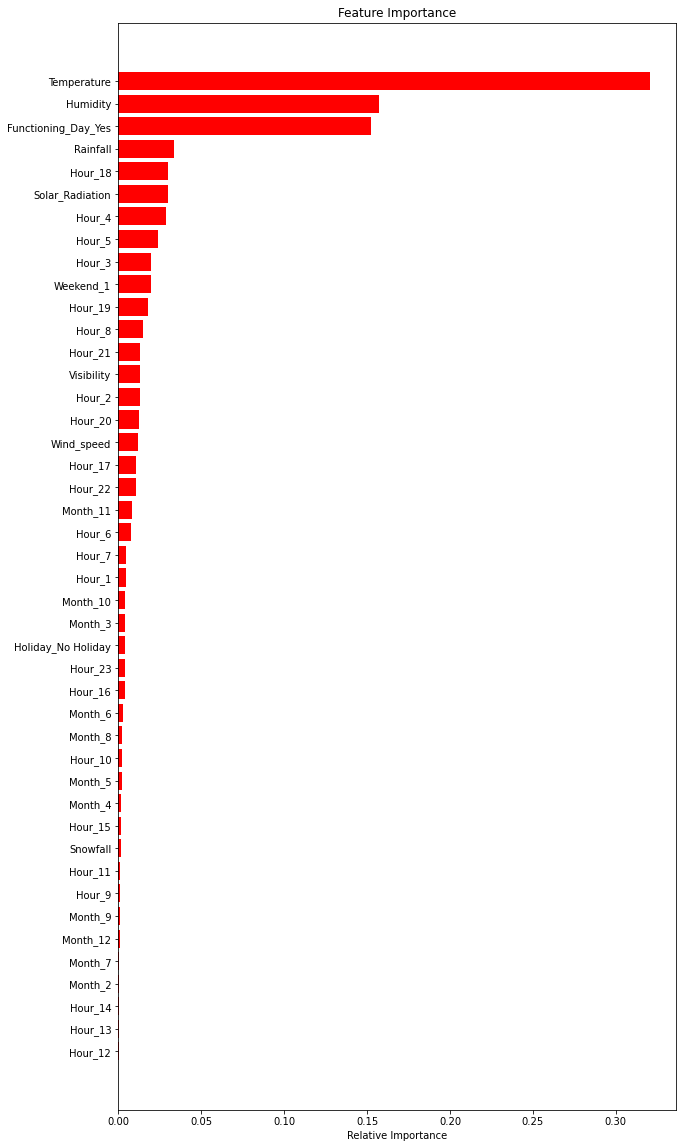

In [ ]:

plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# <b> Comparing results of all the models

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0         Linear regression   4.474  35.078  5.923     0.772   
             1          Lasso regression   4.969  41.644  6.453     0.730   
             2          Ridge regression   4.474  35.078  5.923     0.772   
             3  Dicision tree regression   4.580  37.796  6.148     0.755   
             4  Random forest regression   0.821   1.659  1.288     0.989   
Test set     0         Linear regression   4.410  33.275  5.768     0.789   
             1          Lasso regression   4.912  40.021  6.326     0.747   
             2          Ridge regression   4.410  33.276  5.769     0.789   
             3        Decision tree test   4.741  42.580  6.525     0.730   
             4  Random forest regression   2.223  12.787  3.576     0.919   

                Adjusted R2  
Training set 0         0.77  
             1         0.72  
             2         0.77  
             3         0.72  
             4         0.99  
Test set     0         0.79  
             1         0.74  
             2         0.79  
             3         0.72  
             4         0.92

#**Conclusion**

**From the above project this are the following conclusions that can be incurred:**






*  Peak hours for rented bike is between 7am to 9 am in the morning and 5pm to 7 pm in the evening which suggest that the bikes are rented mostly by the office going people.
*  Demand of rented bikes is high during no holiday and functioning day.

*  Bike Demand was high during spring , summer and autumn owning to the beautiful weather.
* We used different type of regression algorithms to train our model like, Linear Regression, Regularized linear regression (Ridge and Lasso),Random Forest Regressor and Decision tree ,where we tuned the parameters of Decision tree. Out of them Random forest regression gave the best result.
